In [3]:
import os
import sys

curr_path = !pwd
curr_path = curr_path[0] + '/'
curr_path

'/Users/jonathanperalgort/Documents/DL-CMPT420/final_project/src/notebooks/'

In [7]:
attr_file = os.path.join(os.path.dirname(curr_path), '..', '..', 'dataset', 'Anno', 'list_attr_celeba.txt')
attr_file

'/Users/jonathanperalgort/Documents/DL-CMPT420/final_project/src/notebooks/../../dataset/Anno/list_attr_celeba.txt'

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv(attr_file, sep=r"\s+", header=1)
df.replace(-1, 0, inplace=True)
df

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
000001.jpg,0,1,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
000002.jpg,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
000003.jpg,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
000004.jpg,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
000005.jpg,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202595.jpg,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
202596.jpg,0,0,0,0,0,1,1,0,0,1,...,0,1,1,0,0,0,0,0,0,1
202597.jpg,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
202598.jpg,0,1,1,0,0,0,1,0,1,0,...,0,1,0,1,1,0,1,0,0,1


### Unitary EDA

In [33]:
# Gender
male = df[df['Male'] == 1]
female = df[df['Male'] == 0]
print(f"Number of males: {male.shape[0]}, Number of females: {female.shape[0]}")

# Age
young = df[df['Young'] == 1]
old = df[df['Young'] == 0]
print(f"Number of youth: {young.shape[0]}, Number of elderly: {old.shape[0]}")

male.shape[0] + female.shape[0], young.shape[0] + old.shape[0]

Number of males: 84434, Number of females: 118165
Number of youth: 156734, Number of elderly: 45865


(202599, 202599)

In [34]:
u_labels = [
    'Young', 'Old', 'Females', 'Males'
]
u_counts = [
    young.shape[0], old.shape[0], female.shape[0], male.shape[0]
]

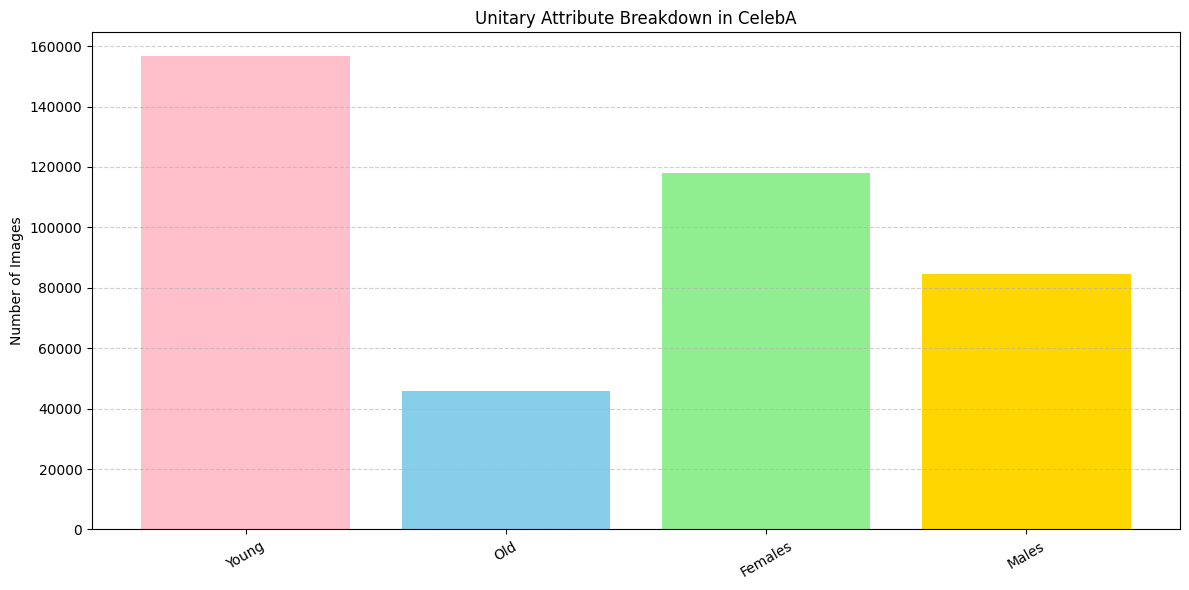

In [35]:
plt.figure(figsize=(12, 6))
plt.bar(u_labels, u_counts, color=['#FFC0CB', '#87CEEB', '#90EE90', '#FFD700'])
plt.title('Unitary Attribute Breakdown in CelebA')
plt.ylabel('Number of Images')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Intersectional EDA (2-classes)

#### Gender intersectional

In [36]:
male_young = male[male['Young'] == 1].shape[0]
male_old = male[male['Young'] == 0].shape[0]
female_young = female[female['Young'] == 1].shape[0]
female_old = female[female['Young'] == 0].shape[0]

male_young, male_old, female_young, female_old

(53447, 30987, 103287, 14878)

In [45]:
g_labels = [
    'Young Females', 'Young Males', 'Old Males', 'Old Females'
]
g_counts = [
    female_young, male_young, male_old, female_old
]

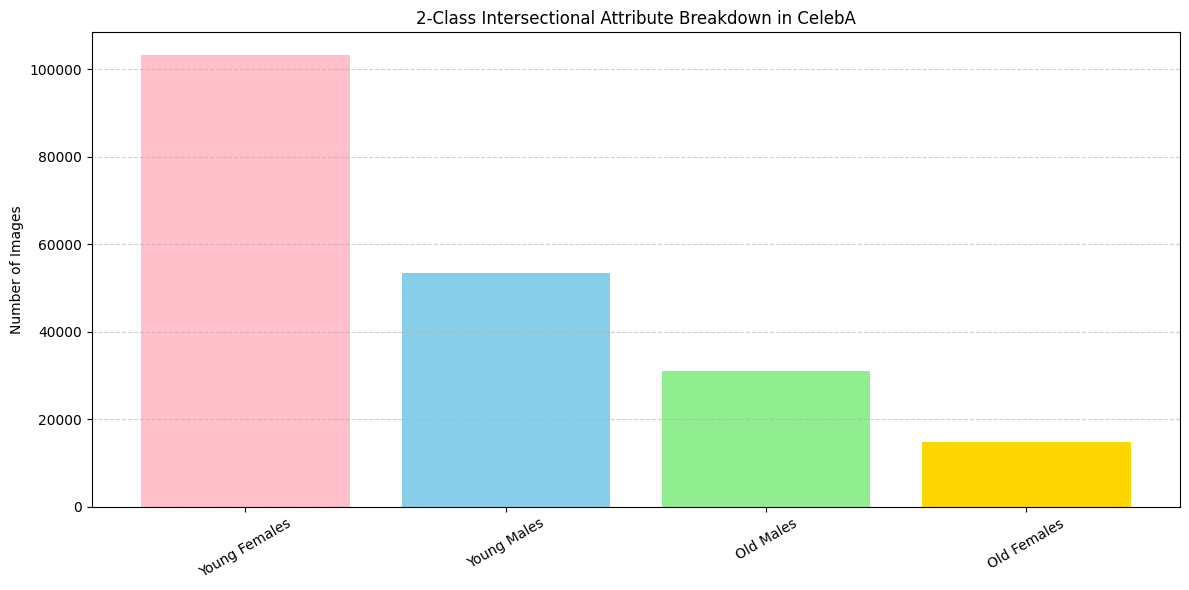

In [59]:
plt.figure(figsize=(12, 6))
plt.bar(g_labels, g_counts, color=['#FFC0CB', '#87CEEB', '#90EE90', '#FFD700'])
plt.title('2-Class Intersectional Attribute Breakdown in CelebA')
plt.ylabel('Number of Images')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Blonde Intersectional

In [ ]:
blonde = df[df["Blond_Hair"] == 1]
non_blonde = df[df["Blond_Hair"] == 0]

blonde.shape[0], non_blonde.shape[0], (blonde.shape[0] + non_blonde.shape[0])

(29983, 172616, 202599)

In [39]:
blonde_female = blonde[blonde["Male"] == 0].shape[0]
blonde_male = blonde[blonde["Male"] == 1].shape[0]
blonde_young = blonde[blonde["Young"] == 1].shape[0]
blonde_old = blonde[blonde["Young"] == 0].shape[0]

blonde_female, blonde_male, blonde_young, blonde_old

(28234, 1749, 24773, 5210)

In [40]:
non_blonde_female = non_blonde[non_blonde["Male"] == 0].shape[0]
non_blonde_male = non_blonde[non_blonde["Male"] == 1].shape[0]
non_blonde_young = non_blonde[non_blonde["Young"] == 1].shape[0]
non_blonde_old = non_blonde[non_blonde["Young"] == 0].shape[0]

non_blonde_female, non_blonde_male, non_blonde_young, non_blonde_old

(89931, 82685, 131961, 40655)

In [50]:
b_labels = [
    'Non-Blonde Young', 'Non-Blonde Female', 'Non-Blonde Male', 'Non-Blonde Old', 'Blonde Female', 'Blonde Young', 'Blonde Old', 'Blonde Male' 
]
b_counts = [
    non_blonde_young, non_blonde_female, non_blonde_male, non_blonde_old, blonde_female, blonde_young, blonde_old, blonde_male
]

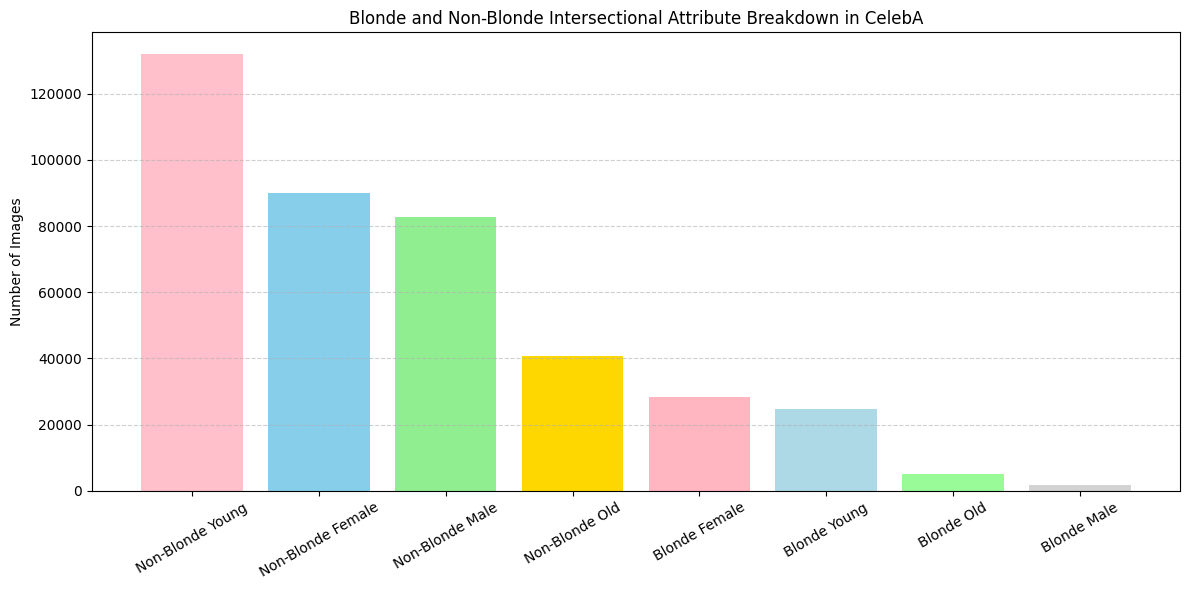

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(b_labels, b_counts, color=['#FFC0CB', '#87CEEB', '#90EE90', '#FFD700',
                               '#FFB6C1', '#ADD8E6', '#98FB98', '#D3D3D3'])
plt.title('Blonde and Non-Blonde Intersectional Attribute Breakdown in CelebA')
plt.ylabel('Number of Images')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()